### Usual Header 


In [1]:
import os
import zipfile
import urllib
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

### Loading and storing the data set

In [173]:
# The download url for the data archive
DOWNLOAD_ROOT = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3136/26502/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1593887598&Signature=VVtwfhhInNosdnHaZnPFLu%2BLrvJhsHTmq6tpS9txNzXC6hQKU%2BzYwKM49jZvQGIqU4mF9sCfAcpLert5bdlW1b7abz7TSpGnzjTcr1iMBSqscdAo30Q7JgpirEDDg9ycqsAQpALgfG3fKR%2BW7j3UB5R%2B2NOxw%2FQ6lxlpB82PYM%2BBWcHk2JDYTK85mKdi3VFsCwdV1mpGT87iAv5CL9UqZEAVlXU2ER2Da8UvST1BuEHsylgIsSzz65LfvU%2B6%2BlG1Is6USegvsPT9I1bzZtL11%2BsvLQKb92uvYLrHdc%2FQ0woCL2BozhIqvWnXUEfTo14%2BQpH4SOq9wIo06jfgjYIyfQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtitanic.zip"
# Where it should be stored
TITANIC_PATH = os.path.join("../datasets", "titanic")
# Where to find it
TITANIC_URL = DOWNLOAD_ROOT + "datasets/titanic/titanic.zip"

#A function to import data from an URL and store it in a directory
def fetch_titanic_data(titanic_url = TITANIC_URL, titanic_path = TITANIC_PATH):
        
        #Create a directory in the path provided and not raise a flag if it exists already
        os.makedirs(titanic_path, exist_ok = True)
        
        #Create a path to the zip file
        zip_path = os.path.join(titanic_path, "titanic.zip")
        
        #Copy the object in the url to its path
        urllib.request.urlretrieve(titanic_url, zip_path)
        
        #Create an interface to the tarfile
        titanic_zip = zipfile.ZipFile(zip_path)
        #Extract it
        titanic_zip.extractall(path=titanic_path)
        #Close it
        titanic_zip.close()
        
        
fetch_titanic_data()

import pandas as pd

#Function to load the data from its path
def load_titanic_data(file,titanic_path=TITANIC_PATH):
    
    #Assert the file is either train or test
    assert file in {"train.csv", "test.csv"}
    
    #Creates a path to the csv data starting from the working directory
    csv_path = os.path.join(titanic_path, file)
    
    #Return the data as a panda data frame
    return pd.read_csv(csv_path)

#The training data set
train_raw = load_titanic_data("train.csv")
test_raw = load_titanic_data("test.csv")

#I will neither vizualize nor use the data set in the following and keep it until I have a suitable model

# First analysis of the data 

In [3]:
# We start with a very basic primary analysis
train_raw.info()
train_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

We can start with a few obvious remarks : 
* Although the datasets contains 891 entries, some of the attributes present missing values, primarily the "Cabin" attribute, which misses a lot of entries. Same with the age attribute and the embarked attribute, even if for the latter only two entries are missing. 
* Some attributes are strings, the rest are either ints or floats

For the first remark, the fact that only two entries are missing for Cabin is uncanny and must be investigated. I'll start by exhibiting those entries. 

For the second remark, some attributes are obviously redundant, like the ticket, which is supposed to be an Id. 
The name could be taken away without loss of information without any loss of information (?). The Cabin one should be checked, and the embarked and sex is nothing but a factor. 

In [4]:
# Looking at general information about the data set
train_raw.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

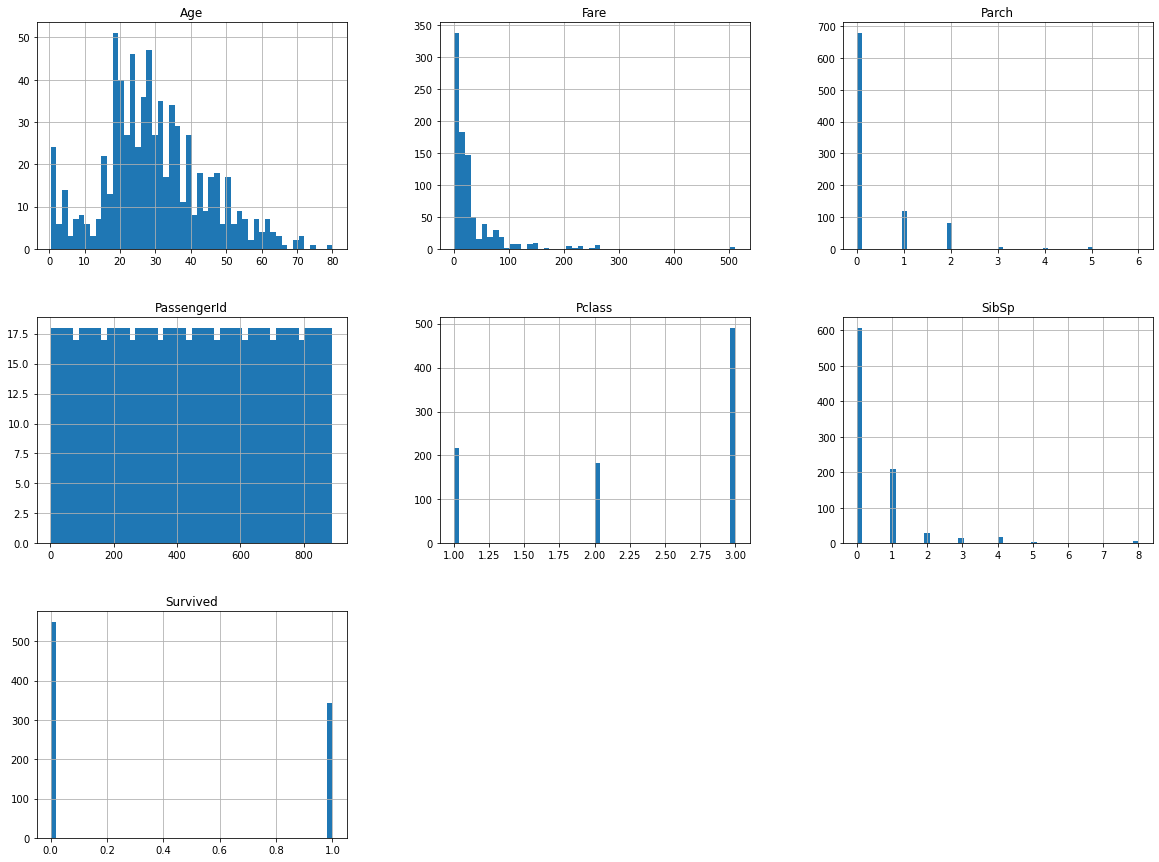

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt 
train_raw.hist(bins = 50,figsize = (20,15))
plt.show()

Relevant information seems to arise from this histogram : 

* Most people were between 20 and 30 yo, and very few old people were on the boat. There were a lot of infants too. 
* The majority of people paid a very small few for the travel. 
* Most people also came alone, with no spouses, children, or siblings
* Most people were in third class, and most people didn't survive

In [6]:
# Looking at the missing features
train_raw.drop("Name",axis=1)


PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked  
0           A/5 21171   7.2500   NaN        S  
1            PC 17599  71.2833   C85        C  
2    STON/O2. 3101282   7.9250   NaN        S  
3              113803  53.1000  C123        S  
4              373450   8.0500   NaN        S  
..                ...      ...   ...      ...  
886            211536  13.0000   NaN        S  
887            112053  30.0000   B42        S  
888        W./C. 6607  23.4500   NaN        S  
889            111369  30.0000  C148        C  
890            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

# Graphic analysis
Kinda hard, don't know what to plot ... 

# Handling text and categorical attributes

We will define transformers to deal with those strings

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [105]:
# We build the pipeline for the preprocessing of the numerical data set
from sklearn.impute import SimpleImputer

# A pipeline to deal with the numeric values only
num_pipeline = Pipeline([
        
        # A pipeline to select some features
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        
        # An imputer to impute the missing values
        ("imputer", SimpleImputer(strategy="median")),
    ])

# Transform the values 
num_pipeline.fit_transform(train_raw)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [109]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#We define an imputer to tackle the string values 
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

# The pipeline for categorical values
cat_pipeline = Pipeline([
        
        # We select the string categories
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        
        # We impute the missing values with the most frequent ones 
        ("imputer", MostFrequentImputer()),
    
        # We one hot encoder impute it
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

# We transform
cat_pipeline.fit_transform(train_raw)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [120]:
# We create a pipeline to tackle both 
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

train = preprocess_pipeline.fit_transform(train_raw)
train

y_train = train_raw["Survived"]

# Training a first model
## SGD Classifier

In [163]:
# We begin by an SGC Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

# We initialize the Classifier
sgd_clf = SGDClassifier()

# We get the scores
scores = cross_val_score(sgd_clf, train, y_train, cv = 5, scoring = 'accuracy')

# We predict using the cross validation method
y_train_pred = cross_val_predict(sgd_clf, train, y_train, cv=5)

# We compute the evaluating scores 
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score: ", precision_score(y_train_pred, y_train))
print("Recall Score: ", recall_score(y_train_pred, y_train))
print("F1 Score: ", f1_score(y_train_pred, y_train))

# We see that the model is not very precise and makes many mistakes
# For a linear model we can't expect much more
# We go through to a random forest model

Precision Score:  0.652046783625731
Recall Score:  0.696875
F1 Score:  0.6737160120845922


## SVM

In [171]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(train, y_train)

y_train_score = cross_val_score(svm_clf, train, y_train, cv = 10, scoring = 'accuracy')
print("Median Score :", y_train_score.mean())
y_train_pred = cross_val_predict(svm_clf, train, y_train, cv = 10)

print("Precision Score: ", precision_score(y_train_pred, y_train))
print("Recall Score: ", recall_score(y_train_pred, y_train))
print("F1 Score: ", f1_score(y_train_pred, y_train))

Median Score : 0.6813233458177278
Precision Score:  0.30116959064327486
Recall Score:  0.6959459459459459
F1 Score:  0.42040816326530617


## Random Forest 

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 1500)
rf_clf.fit(train, y_train)
y_train_score = cross_val_score(rf_clf, train, y_train, cv = 10, scoring = 'accuracy')
print("Median score: ", y_train_score.mean())
y_train_pred = cross_val_predict(rf_clf, train, y_train, cv = 10)

print("Precision Score: ", precision_score(y_train_pred, y_train))
print("Recall Score: ", recall_score(y_train_pred, y_train))
print("F1 Score: ", f1_score(y_train_pred, y_train))

Median score:  0.8115106117353308
Precision Score:  0.7309941520467836
Recall Score:  0.7621951219512195
F1 Score:  0.746268656716418


# Predicting on the test set and exporting the results

In [215]:
PassengerId = test_raw["PassengerId"]
test = preprocess_pipeline.fit_transform(test_raw)


prediction = rf_clf.predict(test)
submission = np.c_[PassengerId, prediction]
submission = pd.DataFrame(data=submission, columns=["PassengerId","Survived"])



submission.to_csv('submission.csv',index=False)